In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file
df = pd.read_csv("results.csv")

In [3]:
param_to_name = {
    "gamma": 'gamma',
    "weight_dispersion": 'rozrzut wag',
    "links": 'liczba połaczeń',
    "flows": 'liczba przepływów',
    "capacity_dispersion": 'rozrzut pojemności'
}

def plot_comparison_with_uncertainty(data, param, start, end):
    subset = data.iloc[start:end]  # Take a subset of rows

    plt.figure(figsize=(12, 6))
    
    # Plot time comparison with lines and uncertainty
    plt.subplot(1, 2, 1)
    plt.errorbar(
        subset[param], subset["time_mean"], yerr=subset["time_std_dev"],
        label="Algorytm", fmt="o", linestyle="-", color="blue", capsize=5
    )
    plt.errorbar(
        subset[param], subset["time_mean_gurobi"], yerr=subset["time_std_dev_gurobi"],
        label="Solver", fmt="o", linestyle="-", color="orange", capsize=5
    )
    # for i, val in enumerate(subset[param]):
    #     plt.text(val, subset["time_mean"].iloc[i], f"{val:.2f}", fontsize=9, color="blue", ha="right")
    #     plt.text(val, subset["time_mean_gurobi"].iloc[i], f"{val:.2f}", fontsize=9, color="orange", ha="left")
    plt.xlabel(param_to_name[param])
    plt.ylabel("Czas [ms]")
    plt.title(f"Czas: Algorytm vs Solver ({param_to_name[param]})")
    plt.legend()
    plt.grid()

    # Plot result comparison with lines and uncertainty
    plt.subplot(1, 2, 2)
    plt.errorbar(
        subset[param], subset["result_mean"], yerr=0,  # Assuming no std_dev for result_mean
        label="Algorytm", fmt="o", linestyle="-", color="green", capsize=5
    )
    plt.errorbar(
        subset[param], subset["result_mean_gurobi"], yerr=0,  # Assuming no std_dev for result_mean_gurobi
        label="Solver", fmt="o", linestyle="-", color="red", capsize=5
    )
    # for i, val in enumerate(subset[param]):
    #     plt.text(val, subset["result_mean"].iloc[i], f"{val:.2f}", fontsize=9, color="green", ha="right")
    #     plt.text(val, subset["result_mean_gurobi"].iloc[i], f"{val:.2f}", fontsize=9, color="red", ha="left")
    plt.xlabel(param_to_name[param])
    plt.ylabel("Użyteczność sieci")
    plt.title(f"Użyteczność sieci: Algorytm vs Solver ({param_to_name[param]})")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


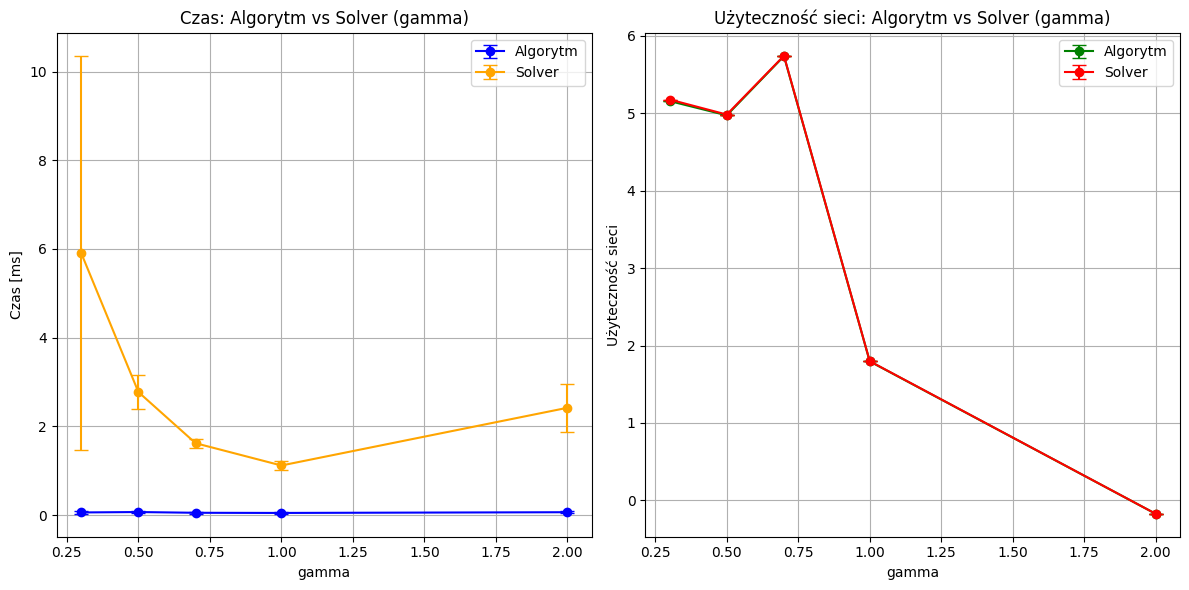

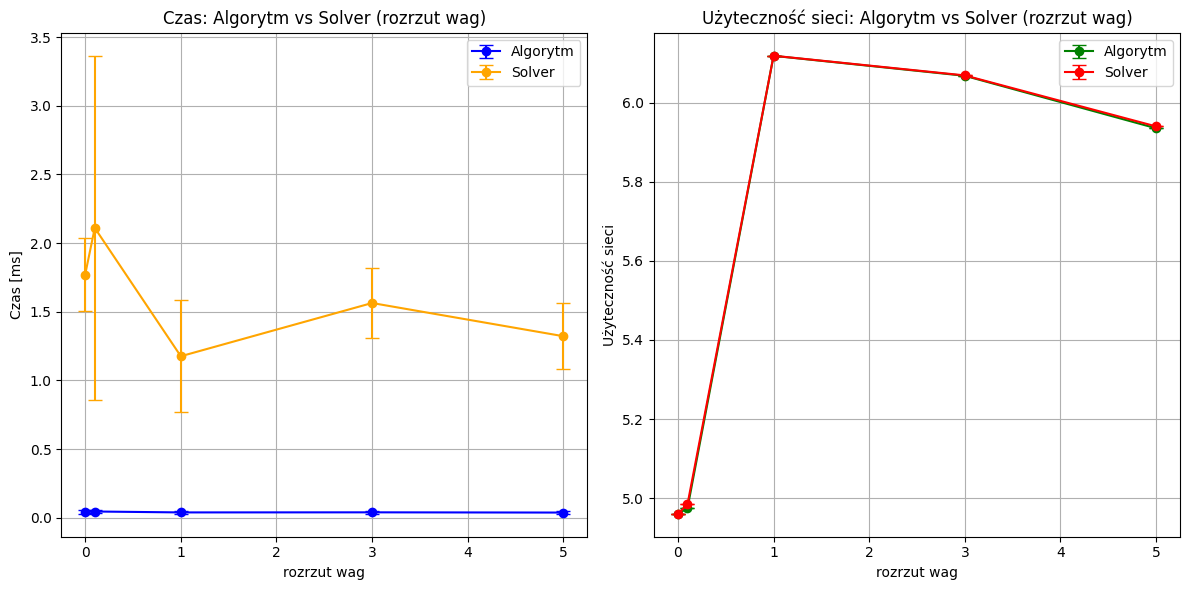

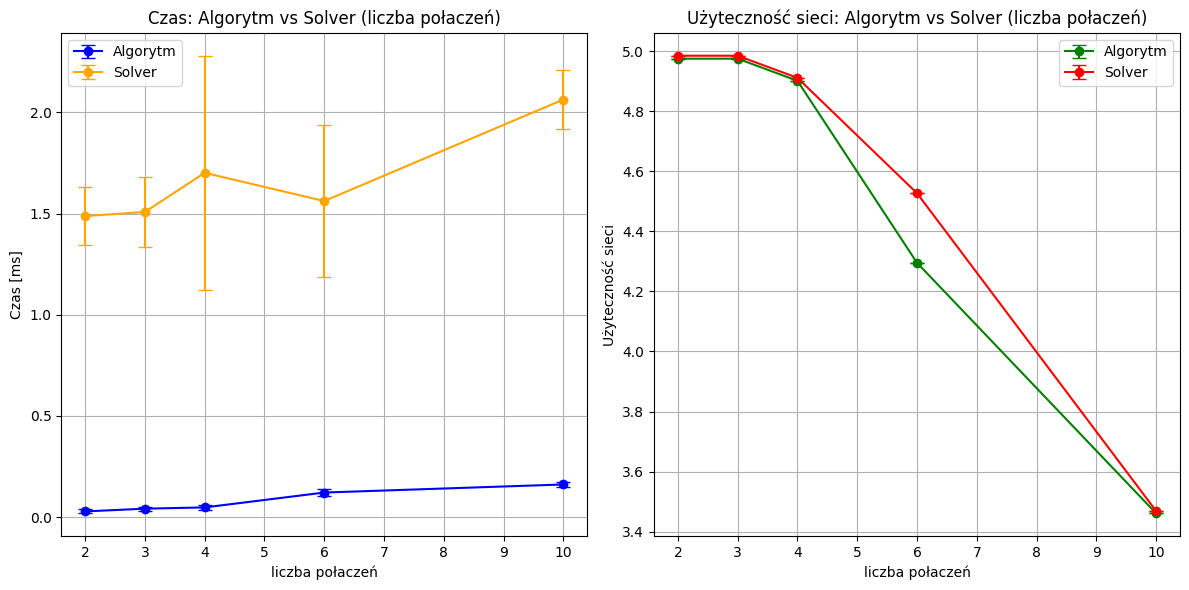

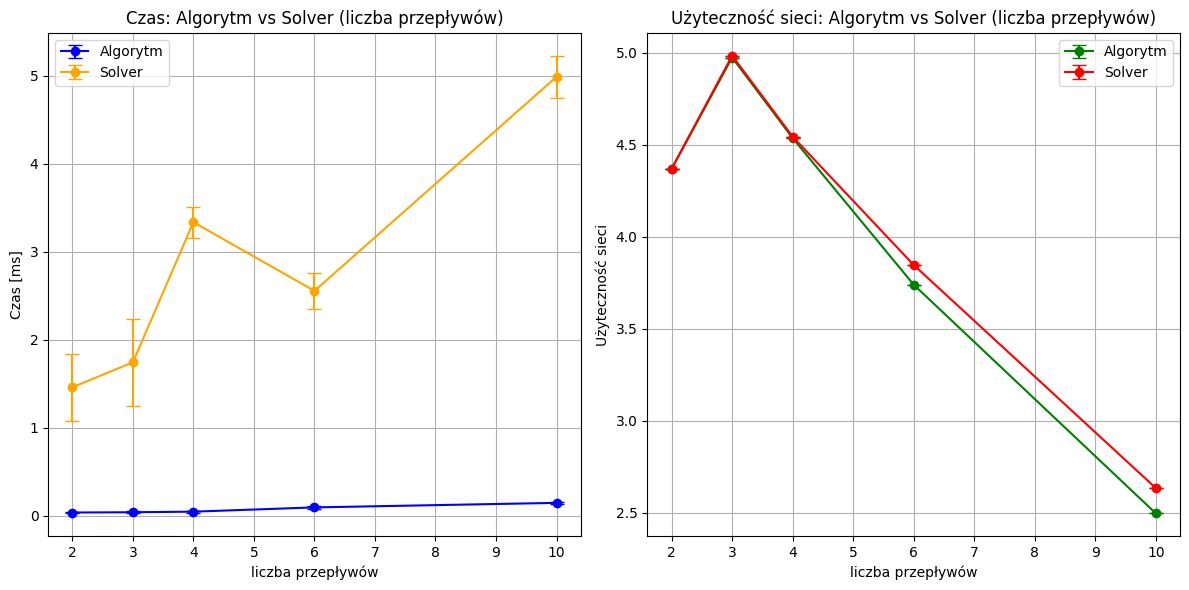

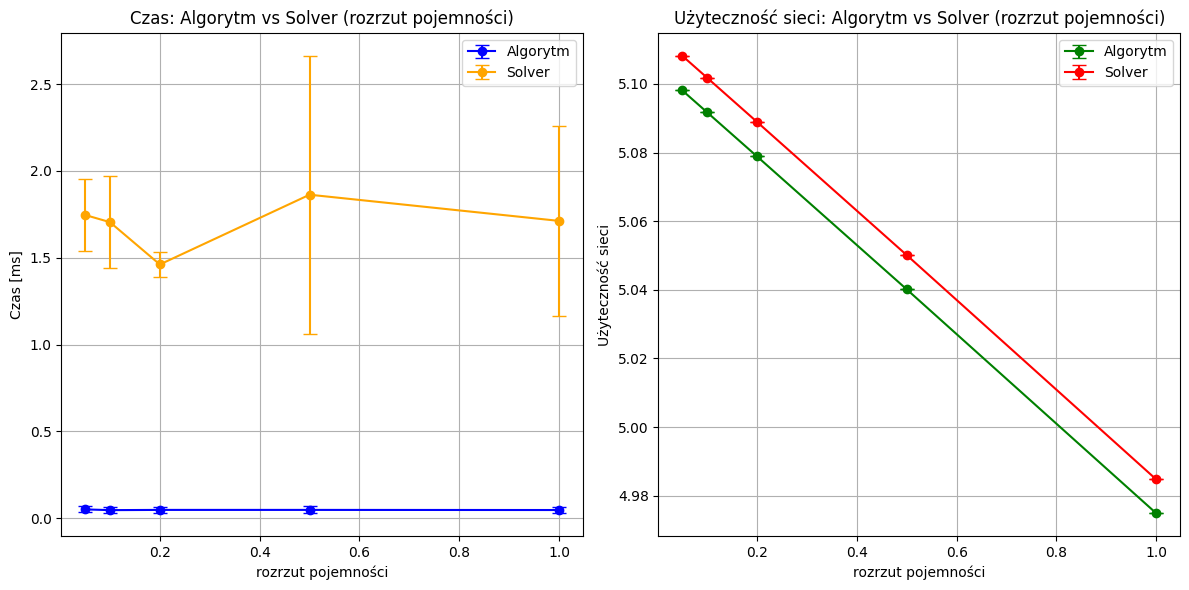

In [4]:
plot_comparison_with_uncertainty(df, param="gamma", start=0, end=5)
plot_comparison_with_uncertainty(df, param="weight_dispersion", start=5, end=10)
plot_comparison_with_uncertainty(df, param="links", start=10, end=15)
plot_comparison_with_uncertainty(df, param="flows", start=15, end=20)
plot_comparison_with_uncertainty(df, param="capacity_dispersion", start=20, end=25)